# Day03

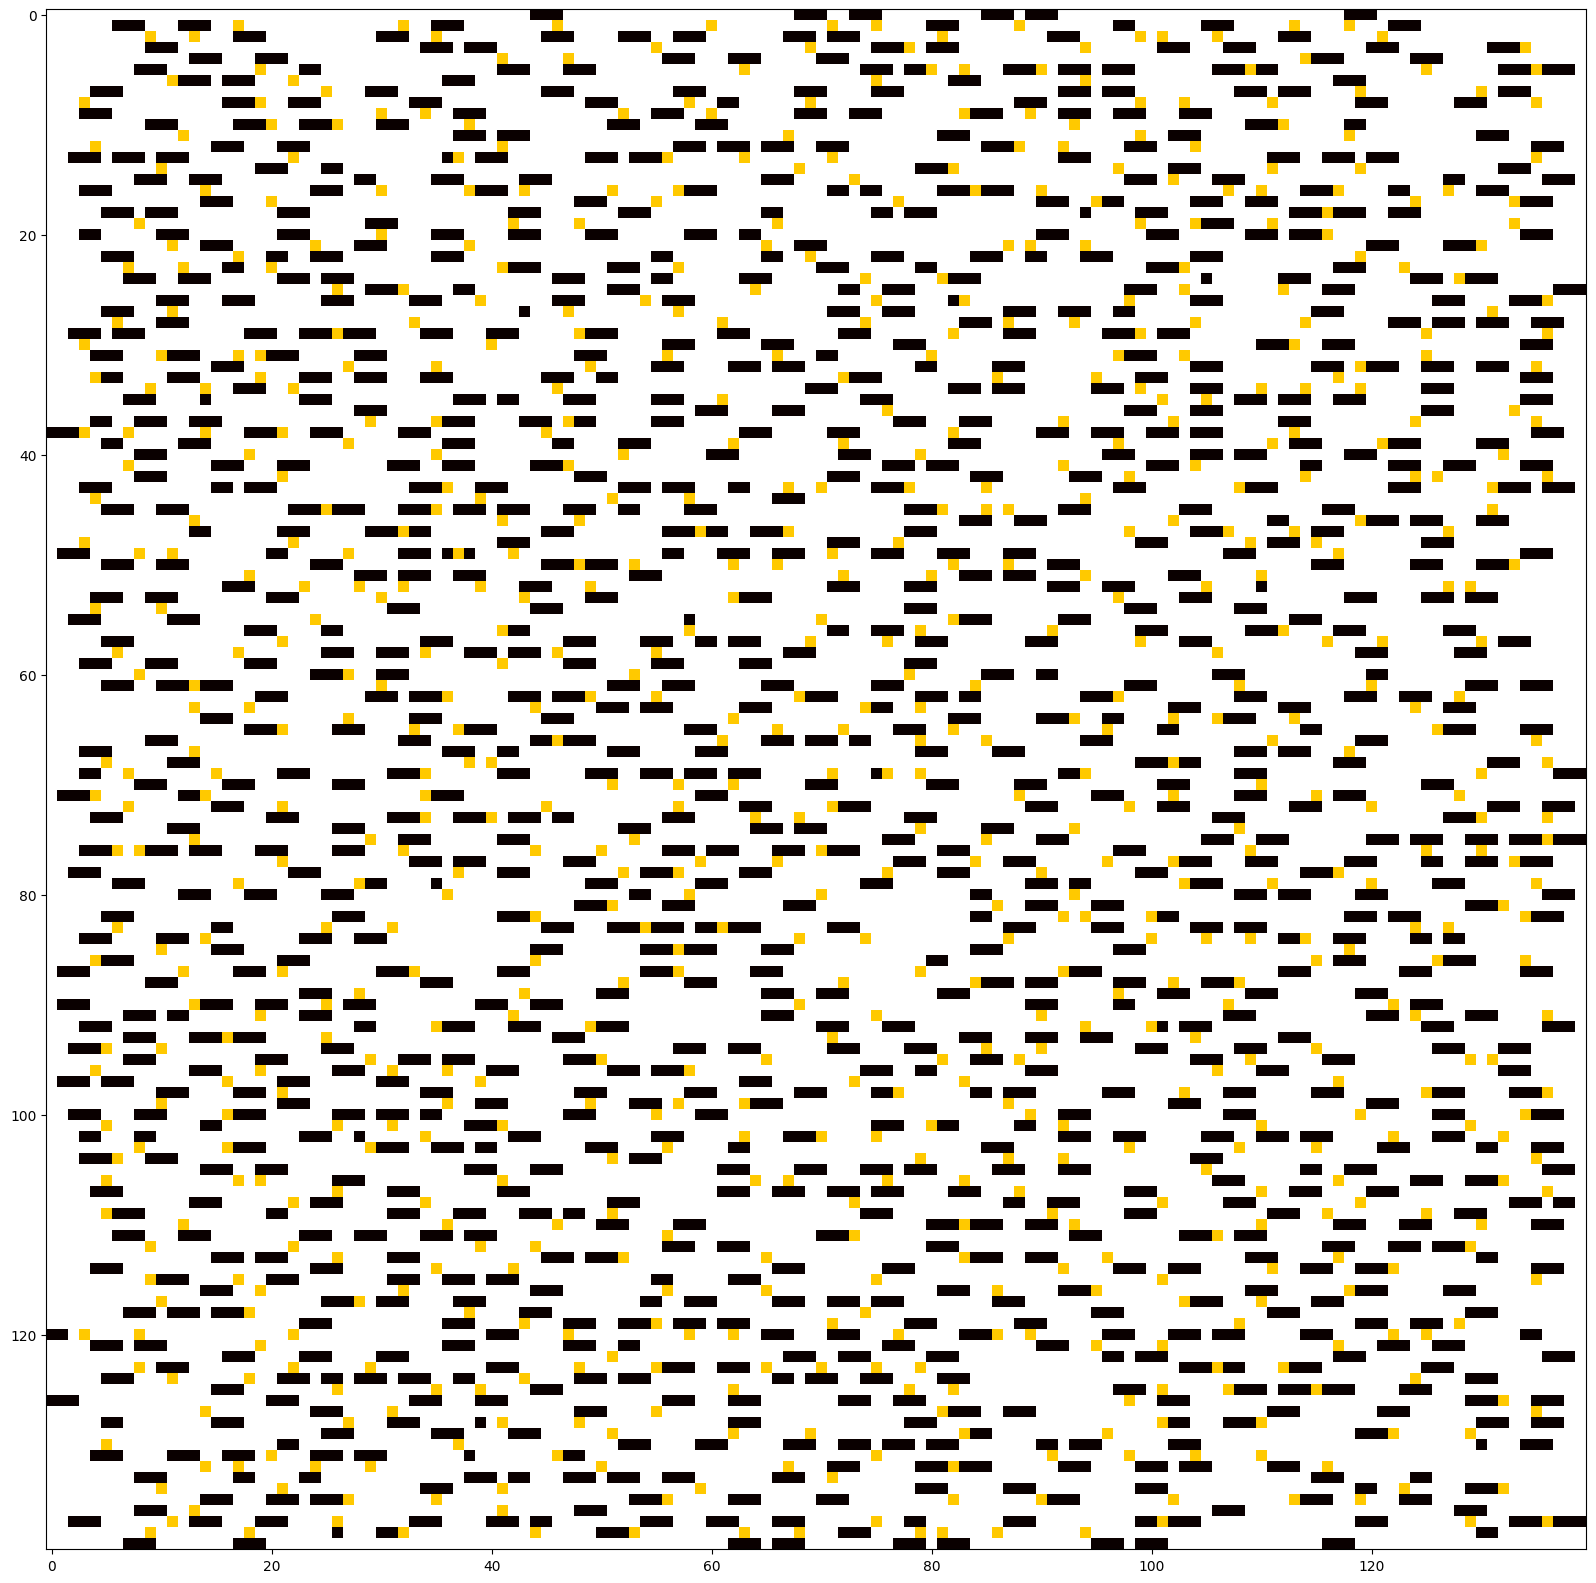

In [1]:
#read input as list of single characters

with open("input.txt") as f:
    input = f.readlines()
input = [x.strip() for x in input]

#plot every character in the input on a 2D grid, mark . as black and digits as white and rest as red

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# get input xy size
x_size = len(input[0])
y_size = len(input)

grid = np.zeros((x_size, y_size))
for i in range(len(input)):
    for j in range(len(input[i])):
        if input[i][j] == '.':
            grid[i][j] = 20
        elif input[i][j].isdigit():
            grid[i][j] = 5
        else:
            grid[i][j] = 15

#bigger plot
plt.figure(figsize=(20,20))
plt.imshow(grid, cmap=cm.hot)
plt.show()

## Part 1

In [2]:
def hasPartSymbol(map,x,y):
    directions = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(-1,-1),(1,-1),(-1,1)]
    for direction in directions:
        if not isValidCord(map,x+direction[0],y+direction[1]):
            continue
        current = map[x+direction[0]][y+direction[1]]
        if not current.isdigit() and not current == '.':
            return True
    return False

def isValidCord(map,x,y):
    if x < 0 or x >= len(map) or y < 0 or y >= len(map[0]):
        return False
    return True

def getNumbersCords(map):
    numbers=[]
    for i in range(len(map)):
        number = ""
        length = 0
        for j in range(len(map[i])):
            if map[i][j].isdigit():
                number += map[i][j]
                length += 1
            elif number != "":
                numbers.append((int(number),i,j-length,length))
                number = ""
                length = 0
        if number != "":
            numbers.append((int(number),i,j-length,length))
            number = ""
            length = 0
    return numbers

In [4]:
result = 0
numbers = getNumbersCords(input)
for number in numbers:
    for digit in range(number[3]):
        if hasPartSymbol(input,number[1],number[2]+digit):
            result += number[0]
            break

result

536202

## Part 2

In [5]:
#find all * cords
def getAllAstrixCords(map):
    astrix = []
    for i in range(len(map)):
        for j in range(len(map[i])):
            if map[i][j] == '*':
                astrix.append((i,j))
    return astrix

def getGearRatio(grid, i, j, numbers):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]
    adjacentCords = [(x, y) for x, y in [(i + direction[0], j + direction[1]) for direction in directions] if isValidCord(grid, x, y)]
    result = []
    for number in numbers:
        if(len(result) > 2):
            return 0
        for digit in range(number[3]):
            if (number[1],number[2]+digit) in adjacentCords:
                if number not in result:
                    result.append(number)
                    break
    if(len(result) == 2):
        return result[0][0] * result[1][0]
    return 0
        
astrx = getAllAstrixCords(input)
sum=0
for asterisk in astrx:
    gearRatio = getGearRatio(input, asterisk[0], asterisk[1], numbers)
    if(gearRatio != 0):
        sum+=gearRatio
        
sum

78272573